In [67]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["Telegram-1-crawler"]
# add here thing to list collecitons and check indices
collection = db["network"]

# Query MongoDB
documents = collection.find({}, {"chat_id": 1, "linked": 1}).limit(20)

In [68]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for document in documents:
    if document["chat_id"] is not None:
        G.add_node(document["chat_id"])
    if document["linked"] is not None:
        G.add_node(document["linked"])

    # Add edge
    if document["chat_id"] is not None and document["linked"] is not None:
        G.add_edge(document["chat_id"], document["linked"])

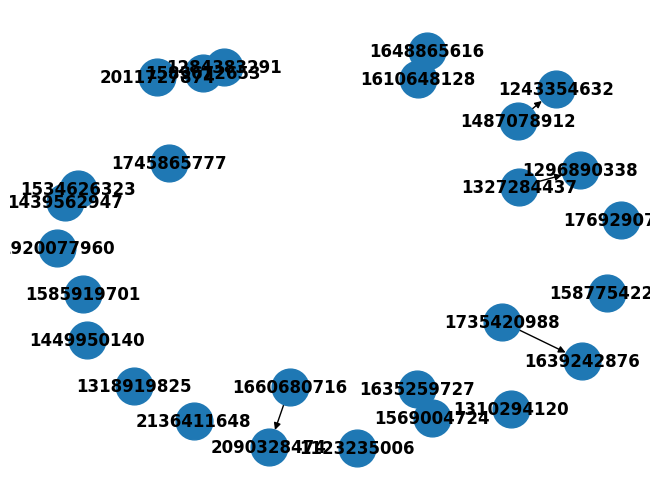

In [69]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G)  # You can choose a layout that suits your data
nx.draw(G, pos, with_labels=True, font_weight="bold", node_size=700)

# Show the plot
plt.show()

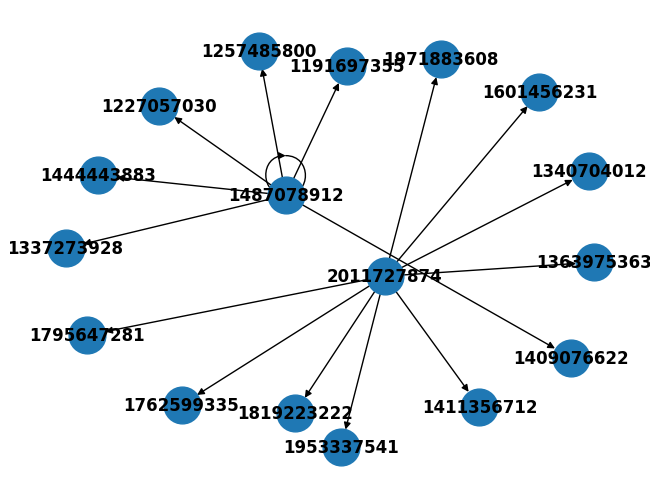

In [133]:
G = nx.DiGraph()

documents = collection.find({}).limit(2).skip(10)

for document in documents:
    chat_id = document["chat_id"]
    G.add_node(chat_id)
    if document["fwd_from"] is not None:
        for fwd in document["fwd_from"]:
            G.add_node(fwd)
            G.add_edge(chat_id, fwd)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight="bold", node_size=700)
plt.show()

1123235006


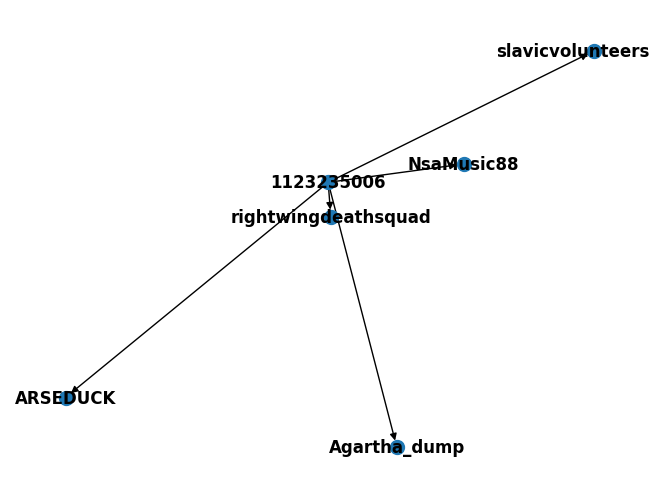

In [107]:
G = nx.DiGraph()

documents = collection.find({}).limit(1).skip(0)
# Add nodes and edges
for document in documents:
    chat_id = document["chat_id"]
    print(chat_id)
    G.add_node(chat_id)
    if document["fwd_from"] is not None:
        for fwd in document["fwd_from"]:
            G.add_node(fwd)
            G.add_edge(chat_id, fwd)
    if document["linked"] is not None:
        link = document["linked"]
        G.add_node(link)
        G.add_edge(chat_id, link)
    if document["mentions_with_tdotme"] is not None:
        for men1 in document["mentions_with_tdotme"]:
            G.add_node(men1)
            G.add_edge(chat_id, men1)
    if document["mentions_with_at"] is not None:
        for men2 in document["mentions_with_at"]:
            G.add_node(men2)
            G.add_edge(chat_id, men2)

pos = nx.random_layout(G)
nx.draw(G, pos, with_labels=True, font_weight="bold", node_size=100)
plt.show()

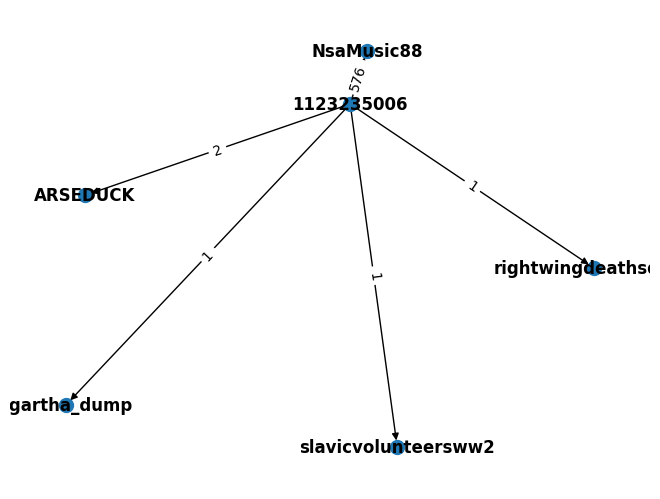

In [135]:
G = nx.DiGraph()

documents = collection.find({}).limit(1).skip(0)
# Dictionary to store the count of each node
node_counts = {}

for document in documents:
    chat_id = document["chat_id"]
    G.add_node(chat_id)

    if document["fwd_from"] is not None:
        for fwd in document["fwd_from"]:
            if fwd not in node_counts:
                node_counts[fwd] = 1
            else:
                node_counts[fwd] += 1

            G.add_node(fwd)
            # Add edge with weight based on occurrence
            G.add_edge(chat_id, fwd, weight=node_counts[fwd])

    if document["linked"] is not None:
        link = document["linked"]
        if link not in node_counts:
            node_counts[link] = 1
        else:
            node_counts[link] += 1

        G.add_node(link)
        # Add edge with weight based on occurrence
        G.add_edge(chat_id, link, weight=node_counts[link])

    if document["mentions_with_tdotme"] is not None:
        for men1 in document["mentions_with_tdotme"]:
            if men1 not in node_counts:
                node_counts[men1] = 1
            else:
                node_counts[men1] += 1

            G.add_node(men1)
            # Add edge with weight based on occurrence
            G.add_edge(chat_id, men1, weight=node_counts[men1])

    if document["mentions_with_at"] is not None:
        for men2 in document["mentions_with_at"]:
            if men2 not in node_counts:
                node_counts[men2] = 1
            else:
                node_counts[men2] += 1

            G.add_node(men2)
            # Add edge with weight based on occurrence
            G.add_edge(chat_id, men2, weight=node_counts[men2])

# Draw the graph with edge labels
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, "weight")
nx.draw(G, pos, with_labels=True, font_weight="bold", node_size=100)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

C:\Users\vrace\AppData\Local\Temp\ipykernel_2344\2772098882.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(unique_colors))


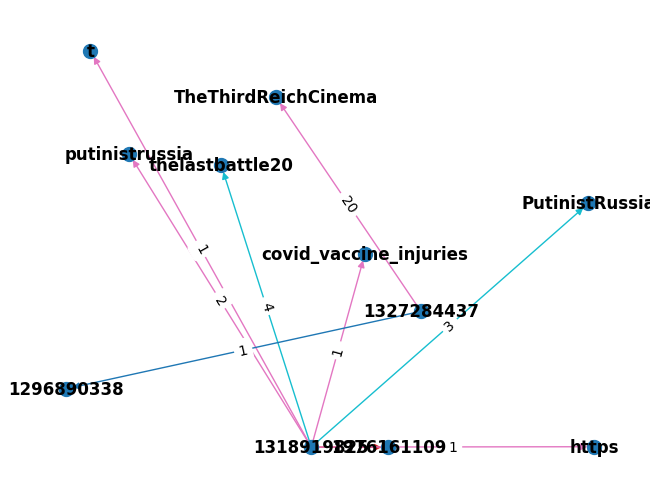

In [138]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Assuming you have a MongoDB collection named 'collection'
documents = collection.find({}).limit(2).skip(2)

# Dictionary to store the count of each node
node_counts = {}

# Add nodes and edges
for document in documents:
    chat_id = document["chat_id"]
    G.add_node(chat_id)

    if document["fwd_from"] is not None:
        for fwd in document["fwd_from"]:
            if fwd not in node_counts:
                node_counts[fwd] = 1
            else:
                node_counts[fwd] += 1

            G.add_node(fwd)
            # Add edge with weight and rel type
            G.add_edge(chat_id, fwd, weight=node_counts[fwd], relation_type="fwd_from")

    if document["linked"] is not None:
        link = document["linked"]
        if link not in node_counts:
            node_counts[link] = 1
        else:
            node_counts[link] += 1

        G.add_node(link)
        # Add edge with weight and rel type
        G.add_edge(chat_id, link, weight=node_counts[link], relation_type="linked")

    if document["mentions_with_tdotme"] is not None:
        for men1 in document["mentions_with_tdotme"]:
            if men1 not in node_counts:
                node_counts[men1] = 1
            else:
                node_counts[men1] += 1

            G.add_node(men1)
            # Add edge with weight and rel type
            G.add_edge(
                chat_id,
                men1,
                weight=node_counts[men1],
                relation_type="mentions_with_tdotme",
            )

    if document["mentions_with_at"] is not None:
        for men2 in document["mentions_with_at"]:
            if men2 not in node_counts:
                node_counts[men2] = 1
            else:
                node_counts[men2] += 1

            G.add_node(men2)
            # Add edge with weight and rel type
            G.add_edge(
                chat_id,
                men2,
                weight=node_counts[men2],
                relation_type="mentions_with_at",
            )

# Draw the graph with edge colors
pos = nx.random_layout(G)
edge_colors = [
    G[relation[0]][relation[1]]["relation_type"] for relation in G.edges(data=True)
]
unique_colors = list(set(edge_colors))
color_map = plt.cm.get_cmap("tab10", len(unique_colors))

color_mapping = {
    relation_type: color_map(unique_colors.index(relation_type))
    for relation_type in unique_colors
}
edge_colors_mapped = [color_mapping[relation_type] for relation_type in edge_colors]

labels = nx.get_edge_attributes(G, "weight")
nx.draw(
    G,
    pos,
    with_labels=True,
    font_weight="bold",
    node_size=100,
    edge_color=edge_colors_mapped,
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()